# Getting Dataset directly from Kaggle and creating proper folder structure

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahid1993","key":"1f90a7e9420b39e2893f0aabffd03ee4"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 66 Sep 10 06:02 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
# List available datasets.
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2759           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      10971           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4409           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         50           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       4122           False  
cat-in-the-dat                                 2019-12-09 23:59:00  Playground            Swag        310           False  
understa

In [0]:
# Copy the data set locally using api link given in Kaggle
!kaggle competitions download -c dogs-vs-cats

  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 73.6MB/s]
 96% 260M/271M [00:02<00:00, 131MB/s]
100% 271M/271M [00:02<00:00, 100MB/s]
 99% 536M/543M [00:05<00:00, 102MB/s] 
100% 543M/543M [00:05<00:00, 96.9MB/s]


In [0]:
!head sampleSubmission.csv

id,label
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [0]:
!unzip train.zip

In [0]:
!unzip test1.zip                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [0]:
#Renaming test1 directory to test
!mv test1 test

# Setting up

In [0]:
!pip install tflearn

!pip freeze

**[TFlearn](http://tflearn.org/)** is a modular and transparent deep learning library built on top of Tensorflow. It was designed to provide a higher-level API to TensorFlow in order to facilitate and speed-up experimentations, while remaining fully transparent and compatible with it.

**[tqdm](https://tqdm.github.io/) :** Instantly make your loops show a smart progress meter - just wrap any iterable with tqdm(iterable), and you're done!

In [0]:
import cv2
import numpy as np
import os         
from random import shuffle 

from tqdm import tqdm      
import tensorflow as tf
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
%matplotlib inline
TRAIN_DIR = 'train'
TEST_DIR = 'test'
IMG_SIZE = 50
LR = 1e-3
MODEL_NAME = 'dogs-vs-cats-convnet'

# Image Preprocessing

We have 25,000 images for training and 12,500 for testing. Let’s create a function that encodes the labels of the training images:

In [0]:
def create_label(image_name):
  """Create one-hot encoded vector from image name"""
  word_label = image_name.split('.')[-3]
  
  if word_label == 'cat':
    return np.array([1,0])
  elif word_label == 'dog':
    return np.array([0,1])
    

Every image will be resized to 50 x 50 pixels and read as grayscale:

In [0]:
def create_train_data():
  training_data = []
  
  for img in tqdm(os.listdir(TRAIN_DIR)):
    path = os.path.join(TRAIN_DIR, img)
    img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    try:      
      img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))

      training_data.append([np.array(img_data), create_label(img)])
    except Exception as e:
      print(img)
      print(e)
    
  shuffle(training_data)

  np.save('train_data.npy', training_data)

  return training_data


def create_test_data():
  testing_data = []
  
  for img in tqdm(os.listdir(TEST_DIR)):
    path = os.path.join(TEST_DIR, img)
    img_num = img.split('.')[0]
    img_data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img_data = cv2.resize(img_data, (IMG_SIZE, IMG_SIZE))
    
    testing_data.append([np.array(img_data), img_num])
    
  shuffle(testing_data)
  np.save('test_data.npy', testing_data)
  return testing_data
    
  
  
  

Now, let’s split the data. 24,500 images for training and 500 for testing. We also need to reshape the data appropriately for TensorFlow:

In [28]:
# If dataset is not created:
train_data = create_train_data()
test_data = create_test_data()

# If you have already created the dataset:
# train_data = np.load('train_data.npy')
# test_data = np.load('test_data.npy')

train = train_data[:-500]
test = train_data[-500:]

X_train = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = [i[1] for i in train]
X_test = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = [i[1] for i in test]


 73%|███████▎  | 18236/25001 [00:17<00:06, 1052.22it/s]

train
OpenCV(3.4.3) /io/opencv/modules/imgproc/src/resize.cpp:4044: error: (-215:Assertion failed) !ssize.empty() in function 'resize'




100%|██████████| 12500/12500 [00:12<00:00, 997.66it/s] 

# Convolutional Neural Nets

They can learn features from raw data.

You can think of convolutions as small sliding lenses (let’s say a 5 x 5) that are “activated” when are placed above some feature that is familiar to them. That way, convolutions can make sense of larger portions of the image, not just single pixels.

# Building our model

We will use tflearn to build our Convolutional Neural Network. One additional bonus will be the use of a *Dropout* layer. 

In [30]:
tf.reset_default_graph()

# Resizing our images to 50 x 50 x 1 matrices

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)

model.fit({'input': X_train}, {'targets': y_train}, n_epoch=10, 
          validation_set=({'input': X_test}, {'targets': y_test}), 
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)


Training Step: 3829  | total loss: 11.96206 | time: 61.537s
| Adam | epoch: 010 | loss: 11.96206 - acc: 0.4805 -- iter: 24448/24500
Training Step: 3830  | total loss: 11.91714 | time: 62.693s
| Adam | epoch: 010 | loss: 11.91714 - acc: 0.4824 | val_loss: 11.32872 - val_acc: 0.5080 -- iter: 24500/24500
--


# Building our (bigger) model

Adding more convolutional and maxpool layers increases the no. of parameters in our model and hence can learn more complex functions

In [32]:
tf.reset_default_graph()
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')
convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')

convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log', tensorboard_verbose=0)

model.fit({'input': X_train}, {'targets': y_train}, n_epoch=10, 
          validation_set=({'input': X_test}, {'targets': y_test}), 
          snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 3829  | total loss: 0.25672 | time: 83.199s
| Adam | epoch: 010 | loss: 0.25672 - acc: 0.8843 -- iter: 24448/24500
Training Step: 3830  | total loss: 0.24824 | time: 84.431s
| Adam | epoch: 010 | loss: 0.24824 - acc: 0.8880 | val_loss: 0.45983 - val_acc: 0.8080 -- iter: 24500/24500
--


# Predictions

cat: 0.9968475699424744, dog: 0.003152452176436782


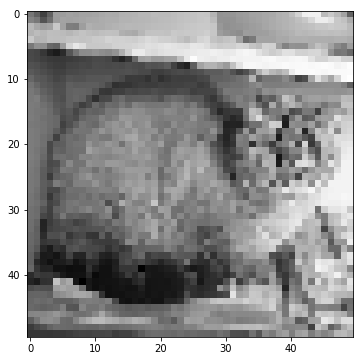

In [33]:
# Single Prediction

d = test_data[0]
img_data, img_num = d

data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
prediction = model.predict([data])[0]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.imshow(img_data, cmap="gray")
print(f"cat: {prediction[0]}, dog: {prediction[1]}")

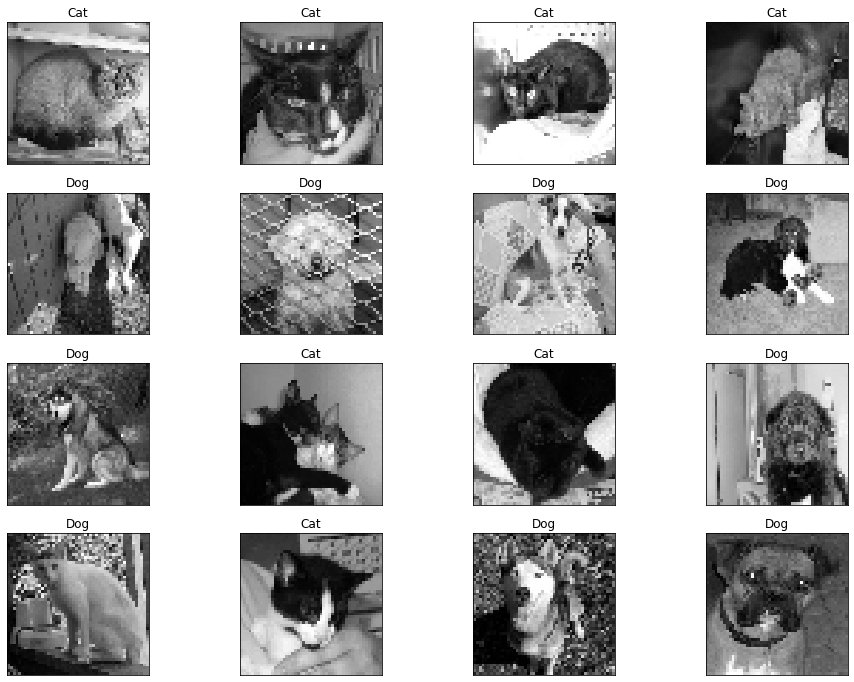

In [34]:
# Multiple Predictions

fig=plt.figure(figsize=(16, 12))

for num, data in enumerate(test_data[:16]):
    
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(4, 4, num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
    
    if np.argmax(model_out) == 1: 
        str_label='Dog'
    else:
        str_label='Cat'
        
    y.imshow(orig, cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()